# Economic Data (Life After Covid)


# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report,precision_score
from sklearn.metrics import recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

# Reading Data-Set

In [2]:
df=pd.read_csv(r'C:\Users\win10\Downloads\economic data.csv')

In [3]:
df

,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close
0,australia,2020-01-01,49.6,50.6,93.4,0.75%,2.20%,1.70%,5.20%,1.20%,audusd,0.7021,0.7031,0.6682,0.6691
1,australia,2020-02-01,50.2,49.0,95.5,0.75%,2.20%,1.70%,5.10%,1.20%,audusd,0.6690,0.6776,0.6434,0.6509
2,australia,2020-03-01,49.7,38.5,91.9,0.50%,2.20%,1.70%,5.20%,1.20%,audusd,0.6488,0.6686,0.5507,0.6135
3,australia,2020-04-01,44.1,19.5,75.6,0.25%,-0.30%,1.20%,6.30%,-6.10%,audusd,0.6133,0.6571,0.5979,0.6510
4,australia,2020-05-01,44.0,26.9,88.1,0.25%,-0.30%,1.20%,7.00%,-6.10%,audusd,0.6511,0.6684,0.6371,0.6666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,united states,2023-08-01,47.6,54.5,71.2,5.50%,3.70%,4.30%,3.80%,2.90%,dxy,101.8700,104.4500,101.7400,103.6200
428,united states,2023-09-01,49.0,53.6,67.7,5.50%,3.70%,4.10%,3.80%,2.90%,dxy,103.6200,106.8400,103.2700,106.2200
429,united states,2023-10-01,46.7,51.8,63.8,5.50%,3.20%,4.00%,3.90%,3.10%,dxy,106.1700,107.3500,105.3600,106.6600
430,united states,2023-11-01,46.7,52.5,61.3,5.50%,3.10%,4.00%,3.70%,3.10%,dxy,106.6700,107.1100,102.4700,103.5000


# Data Pre-Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              432 non-null    object 
 1   date                 432 non-null    object 
 2   manufacturing pmi    432 non-null    float64
 3   services pmi         432 non-null    float64
 4   consumer confidence  432 non-null    float64
 5   interest rates       432 non-null    object 
 6   cpi yoy              432 non-null    object 
 7   core cpi             432 non-null    object 
 8   unemployment rate    432 non-null    object 
 9   gdp yoy              432 non-null    object 
 10  ticker               432 non-null    object 
 11  open                 432 non-null    float64
 12  high                 432 non-null    float64
 13  low                  432 non-null    float64
 14  close                432 non-null    float64
dtypes: float64(7), object(8)
memory usage: 5

In [5]:
df['gdp yoy'] = df['gdp yoy'].str.rstrip('%').astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              432 non-null    object 
 1   date                 432 non-null    object 
 2   manufacturing pmi    432 non-null    float64
 3   services pmi         432 non-null    float64
 4   consumer confidence  432 non-null    float64
 5   interest rates       432 non-null    object 
 6   cpi yoy              432 non-null    object 
 7   core cpi             432 non-null    object 
 8   unemployment rate    432 non-null    object 
 9   gdp yoy              432 non-null    float64
 10  ticker               432 non-null    object 
 11  open                 432 non-null    float64
 12  high                 432 non-null    float64
 13  low                  432 non-null    float64
 14  close                432 non-null    float64
dtypes: float64(8), object(7)
memory usage: 5

In [7]:
df.shape

(432, 15)

In [8]:
df.describe()

,manufacturing pmi,services pmi,consumer confidence,gdp yoy,open,high,low,close
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,51.878935,51.111968,42.679051,1.894444,25.934223,26.467713,25.493275,26.020603
std,6.121829,7.205442,51.862085,5.562154,45.859841,46.860450,45.028341,46.039390
min,26.000000,12.000000,-52.500000,-21.900000,0.559300,0.587400,0.547000,0.559400
25%,48.275000,48.600000,-10.525000,0.200000,0.910300,0.921625,0.891900,0.908800
50%,51.100000,51.850000,49.290000,1.700000,1.257650,1.281150,1.230350,1.257150
75%,55.925000,55.200000,86.850000,4.500000,7.063525,7.131225,6.979650,7.082575
max,70.000000,67.600000,127.000000,25.700000,151.710000,151.960000,147.380000,151.670000


In [9]:
df.head()

,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close
0,australia,2020-01-01,49.6,50.6,93.4,0.75%,2.20%,1.70%,5.20%,1.2,audusd,0.7021,0.7031,0.6682,0.6691
1,australia,2020-02-01,50.2,49.0,95.5,0.75%,2.20%,1.70%,5.10%,1.2,audusd,0.6690,0.6776,0.6434,0.6509
2,australia,2020-03-01,49.7,38.5,91.9,0.50%,2.20%,1.70%,5.20%,1.2,audusd,0.6488,0.6686,0.5507,0.6135
3,australia,2020-04-01,44.1,19.5,75.6,0.25%,-0.30%,1.20%,6.30%,-6.1,audusd,0.6133,0.6571,0.5979,0.6510
4,australia,2020-05-01,44.0,26.9,88.1,0.25%,-0.30%,1.20%,7.00%,-6.1,audusd,0.6511,0.6684,0.6371,0.6666


In [10]:
df.tail()

,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close
427,united states,2023-08-01,47.6,54.5,71.2,5.50%,3.70%,4.30%,3.80%,2.9,dxy,101.87,104.45,101.74,103.62
428,united states,2023-09-01,49.0,53.6,67.7,5.50%,3.70%,4.10%,3.80%,2.9,dxy,103.62,106.84,103.27,106.22
429,united states,2023-10-01,46.7,51.8,63.8,5.50%,3.20%,4.00%,3.90%,3.1,dxy,106.17,107.35,105.36,106.66
430,united states,2023-11-01,46.7,52.5,61.3,5.50%,3.10%,4.00%,3.70%,3.1,dxy,106.67,107.11,102.47,103.50
431,united states,2023-12-01,47.4,50.5,69.7,5.50%,3.40%,3.90%,3.70%,3.1,dxy,103.36,104.26,100.62,101.33


# Data Wrangling

In [11]:
df.isnull()

,country,date,manufacturing pmi,services pmi,consumer confidence,interest rates,cpi yoy,core cpi,unemployment rate,gdp yoy,ticker,open,high,low,close
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
428,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
429,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
430,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

country                0
date                   0
manufacturing pmi      0
services pmi           0
consumer confidence    0
interest rates         0
cpi yoy                0
core cpi               0
unemployment rate      0
gdp yoy                0
ticker                 0
open                   0
high                   0
low                    0
close                  0
dtype: int64

In [13]:
df.nunique()

country                  9
date                    48
manufacturing pmi      204
services pmi           219
consumer confidence    320
interest rates          46
cpi yoy                107
core cpi                83
unemployment rate       78
gdp yoy                 88
ticker                   9
open                   427
high                   428
low                    418
close                  426
dtype: int64

In [14]:
df.close.value_counts()

close
6.4730      2
97.3900     2
0.6124      2
1.0576      2
104.6800    2
           ..
7.3158      1
7.3010      1
7.2582      1
7.1426      1
101.3300    1
Name: count, Length: 426, dtype: int64

In [15]:
Q3=np.percentile(df.describe(),75)
Q1=np.percentile(df.describe(),25)
Q2=np.percentile(df.describe(),50)


IQR=Q3-Q1
print('Q2:',Q2)
print('Q3:',Q3)
print('Q1:',Q1)
print('IQR:',IQR)

Q2: 26.244158101851852
Q3: 58.84375
Q1: 1.5952875
IQR: 57.2484625


In [16]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [17]:
upper_array = np.where(df.describe() >= upper)[0]
lower_array = np.where(df.describe() <= lower)[0]
 
# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

New Shape:  (430, 15)


In [18]:
from scipy import stats
skew=stats.skew(df.describe())
print('skewness:',skew)

skewness: [2.17360151 2.15950573 1.65425586 2.235287   1.83190674 1.82957506
 1.85214831 1.83186346]


In [19]:
log_transformed_data = np.log(skew)

In [20]:
print('skewness:',log_transformed_data)

skewness: [0.77638547 0.76987937 0.50335128 0.80436963 0.60535736 0.60408373
 0.61634621 0.60533373]


In [21]:
corre=stats.spearmanr(df.describe())

In [22]:
corre

SignificanceResult(statistic=array([[1.        , 0.97619048, 0.73809524, 0.64285714, 0.61904762,
        0.61904762, 0.61904762, 0.61904762],
       [0.97619048, 1.        , 0.76190476, 0.61904762, 0.57142857,
        0.57142857, 0.57142857, 0.57142857],
       [0.73809524, 0.76190476, 1.        , 0.95238095, 0.88095238,
        0.88095238, 0.88095238, 0.88095238],
       [0.64285714, 0.61904762, 0.95238095, 1.        , 0.97619048,
        0.97619048, 0.97619048, 0.97619048],
       [0.61904762, 0.57142857, 0.88095238, 0.97619048, 1.        ,
        1.        , 1.        , 1.        ],
       [0.61904762, 0.57142857, 0.88095238, 0.97619048, 1.        ,
        1.        , 1.        , 1.        ],
       [0.61904762, 0.57142857, 0.88095238, 0.97619048, 1.        ,
        1.        , 1.        , 1.        ],
       [0.61904762, 0.57142857, 0.88095238, 0.97619048, 1.        ,
        1.        , 1.        , 1.        ]]), pvalue=array([[0.00000000e+00, 3.31439603e-05, 3.65527611e-02, 8.

In [23]:
corre  = df.describe().values.reshape((2, -1))

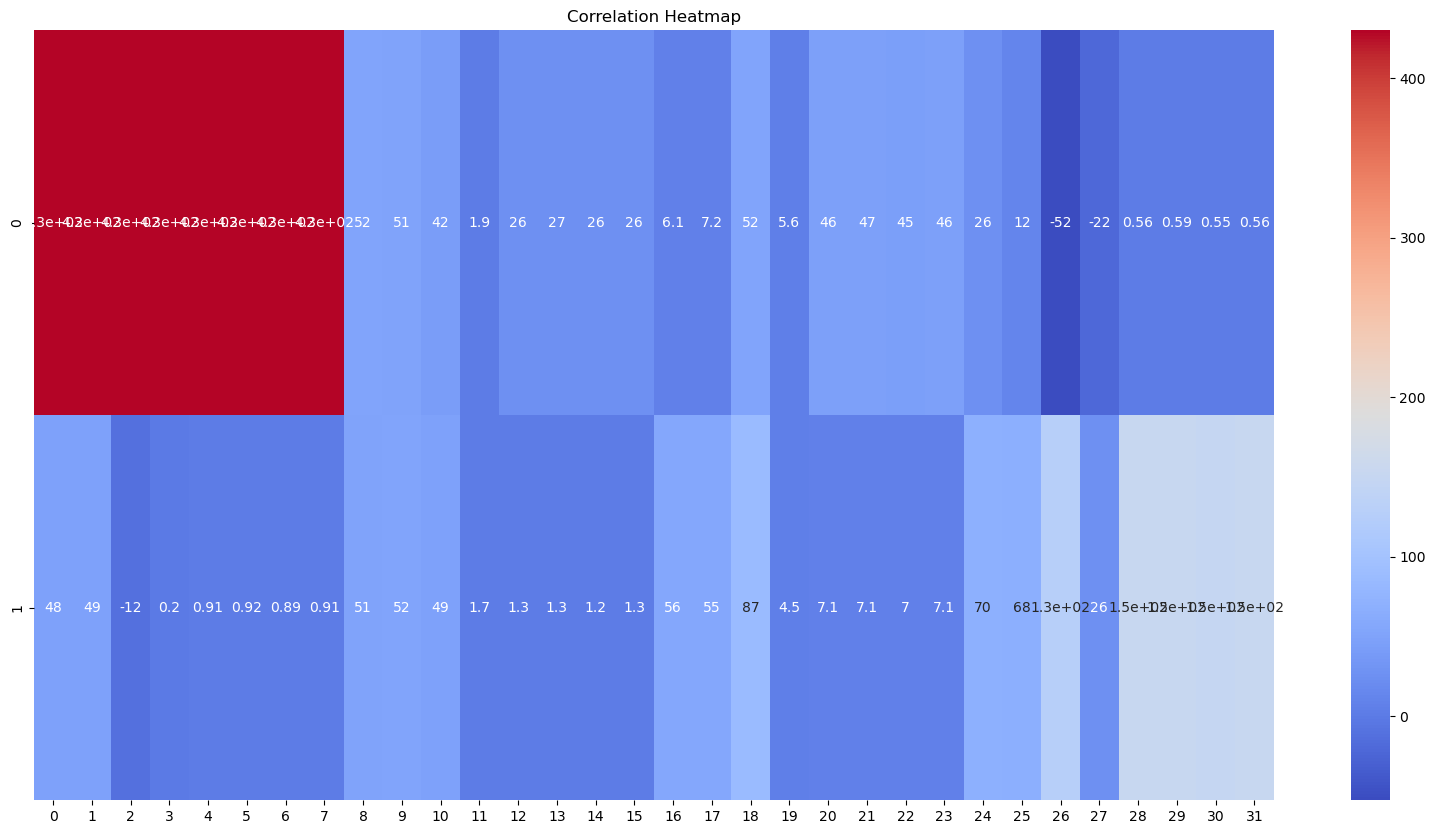

In [24]:
# Set up the matplotlib figure
plt.figure(figsize=(20,10))

# Plot the heatmap
sns.heatmap(corre,annot=True,cmap="coolwarm") 

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

# EDA

In [25]:
df_subset=df[['country','unemployment rate','gdp yoy']]

In [26]:
%matplotlib inline

Text(0.5, 1.0, "Histogram with pdf for feature 'gdp yoy'")

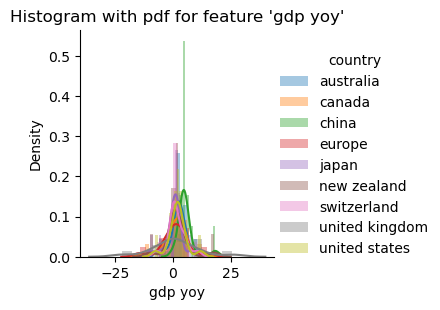

In [27]:
sns.FacetGrid(df_subset,hue='country').map(sns.distplot,'gdp yoy').add_legend()
plt.title("Histogram with pdf for feature 'gdp yoy'")

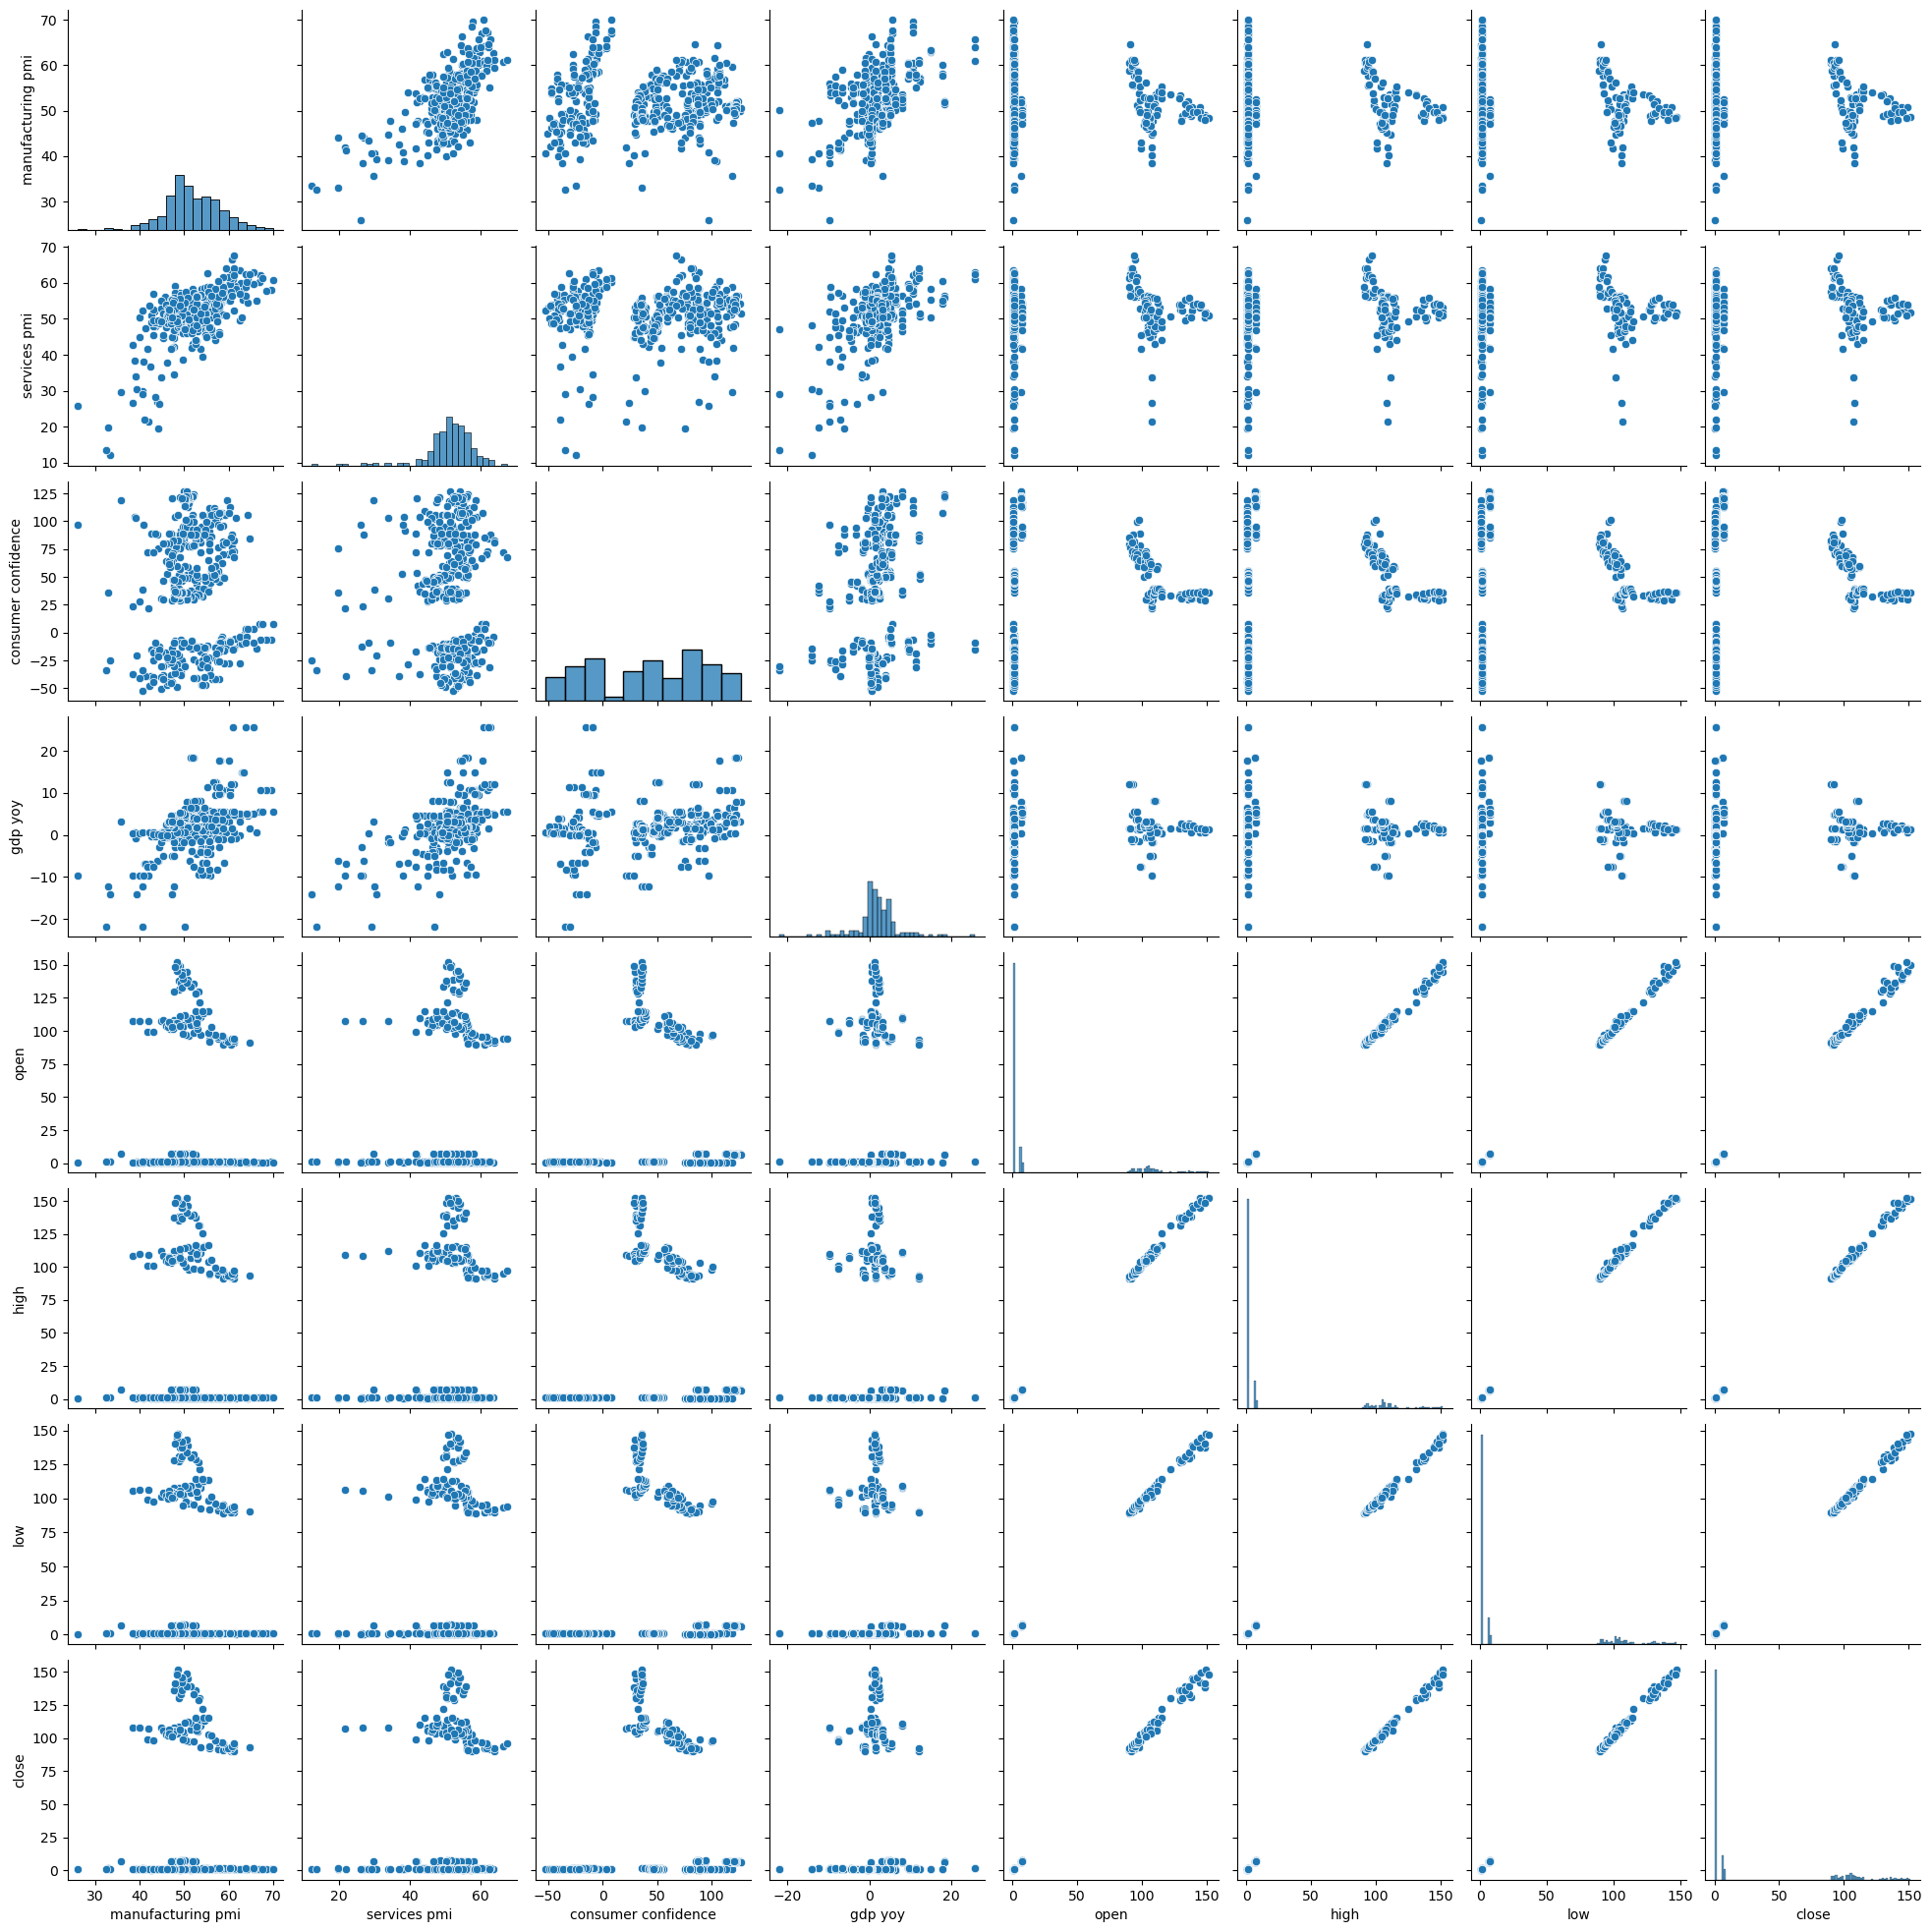

In [28]:
sns.pairplot(df)

<Axes: xlabel='country', ylabel='gdp yoy'>

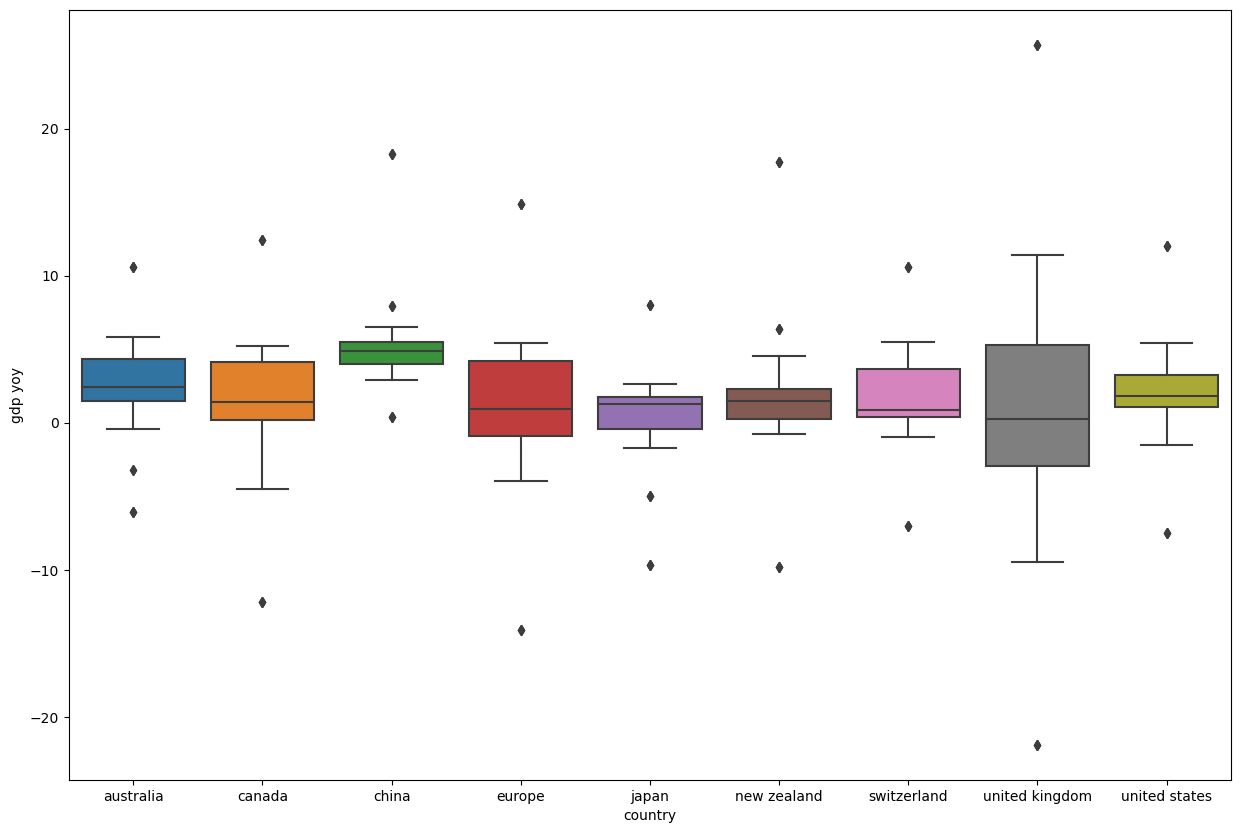

In [29]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_subset,y='gdp yoy', x='country')


<Axes: xlabel='country', ylabel='gdp yoy'>

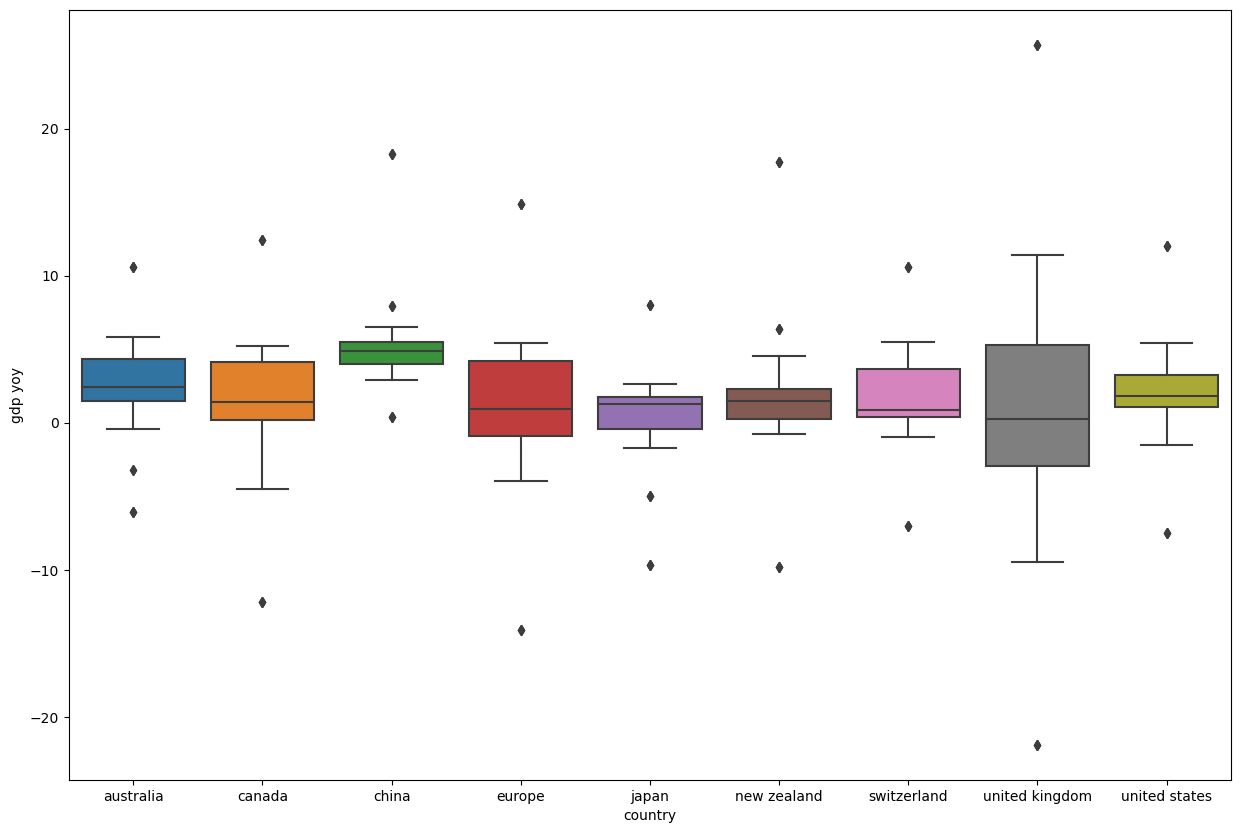

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_subset,y='gdp yoy', x='country')


<Axes: xlabel='country', ylabel='gdp yoy'>

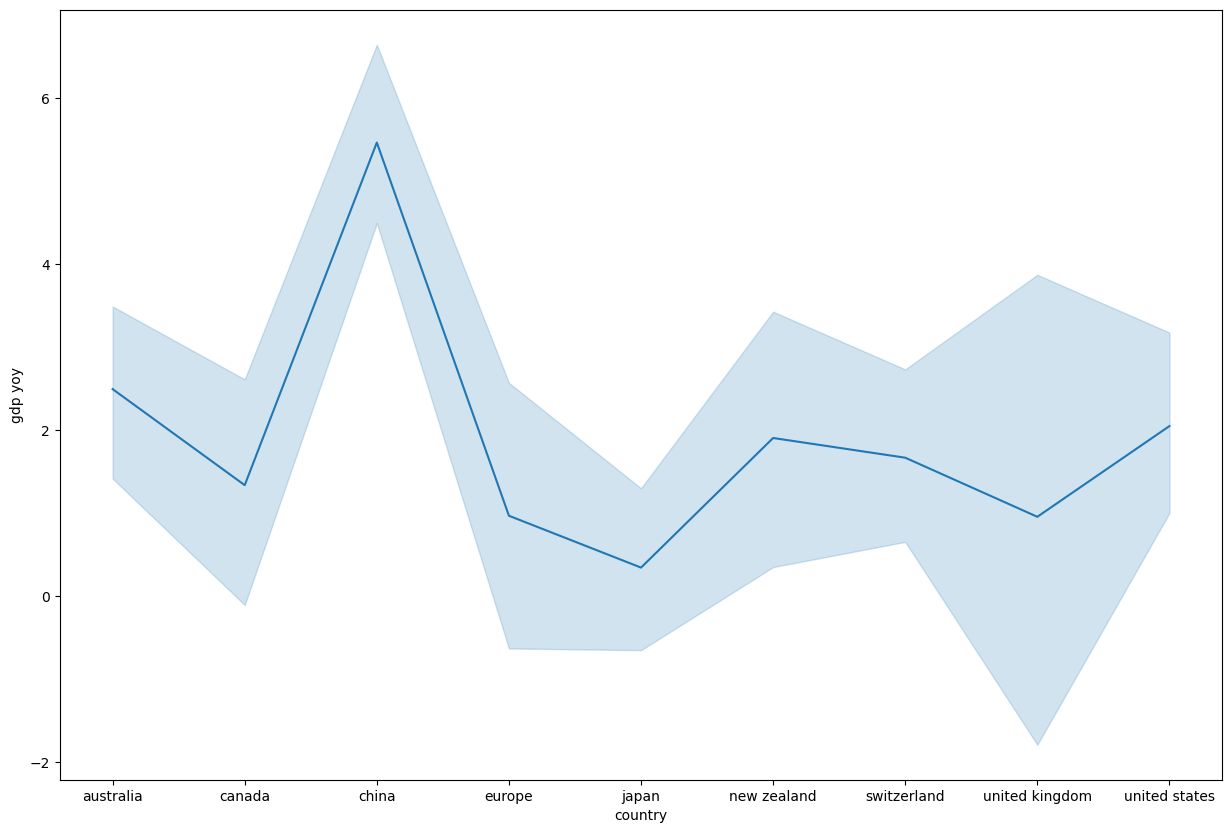

In [31]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_subset,y='gdp yoy', x='country')


<Axes: xlabel='country', ylabel='gdp yoy'>

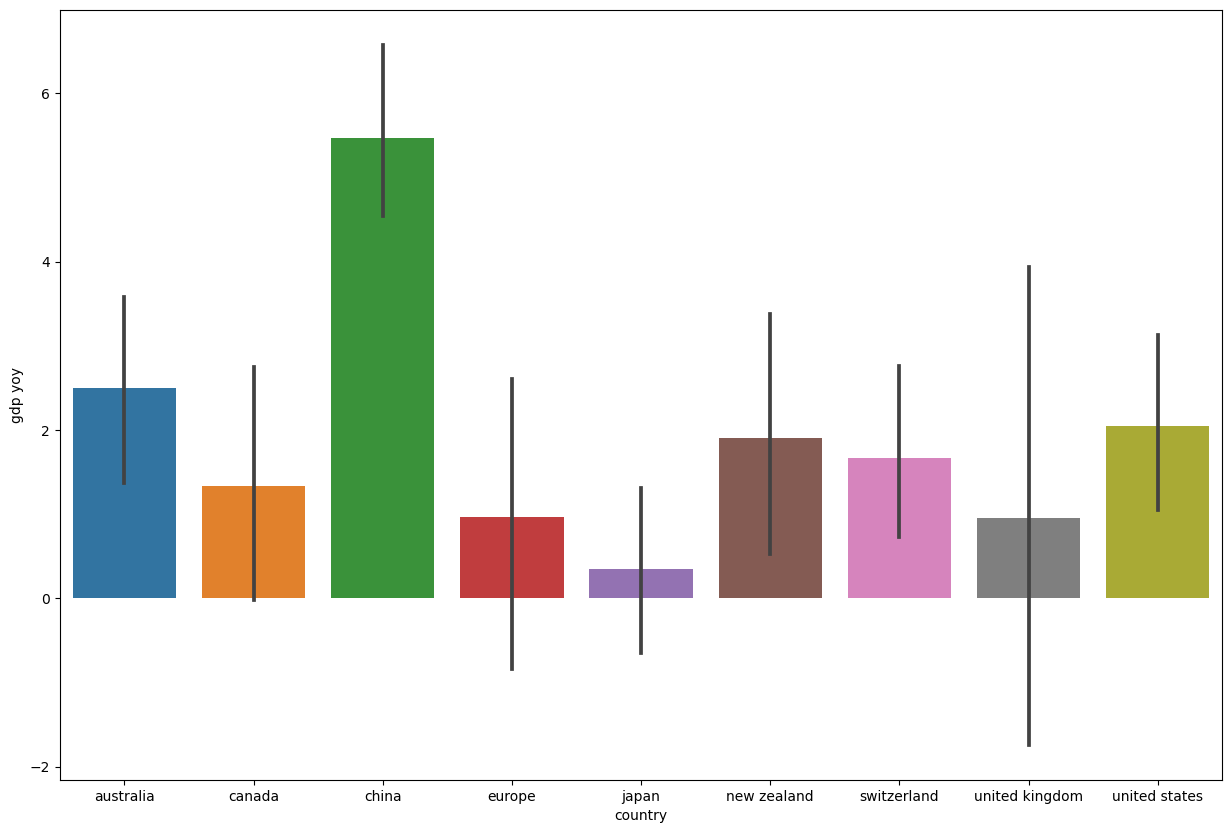

In [32]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_subset,y='gdp yoy', x='country')


<Axes: xlabel='country', ylabel='gdp yoy'>

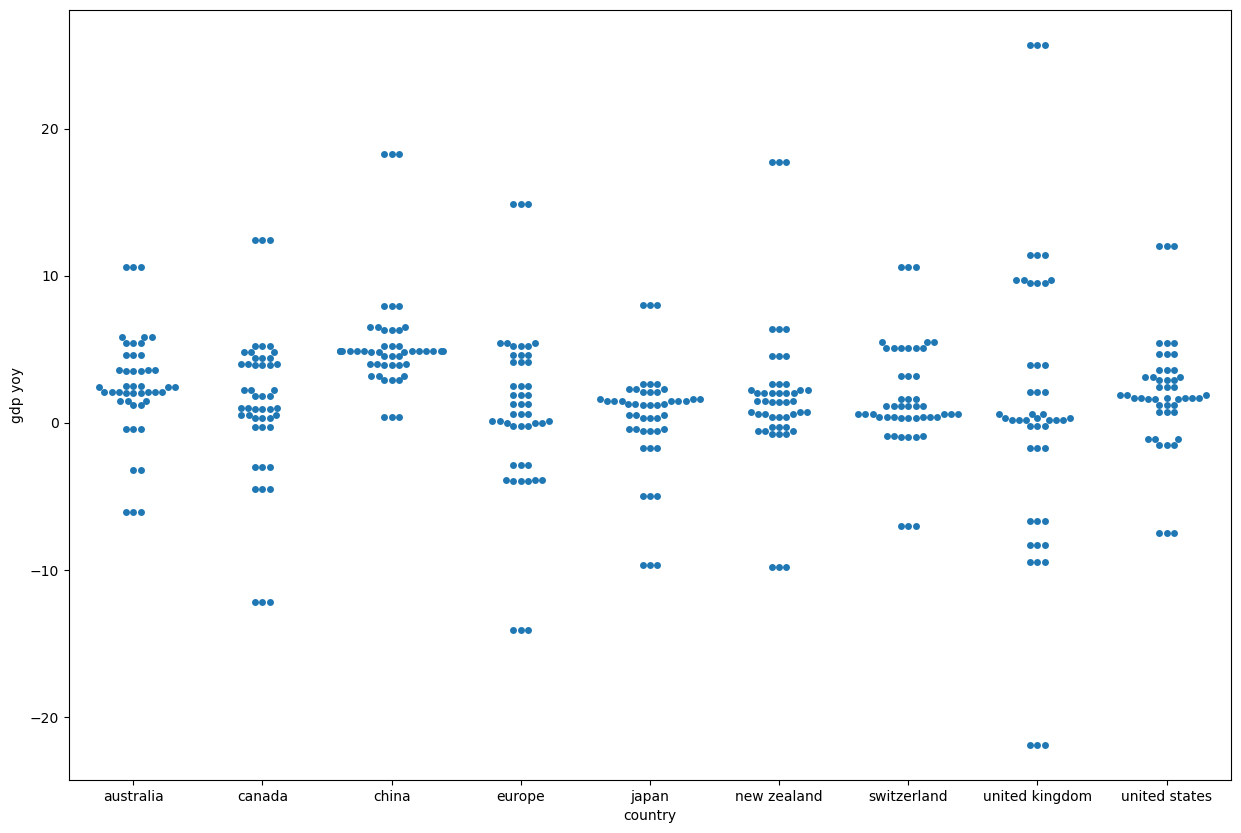

In [33]:
plt.figure(figsize=(15,10))
sns.swarmplot(data=df_subset,y='gdp yoy', x='country')


<Axes: xlabel='country', ylabel='gdp yoy'>

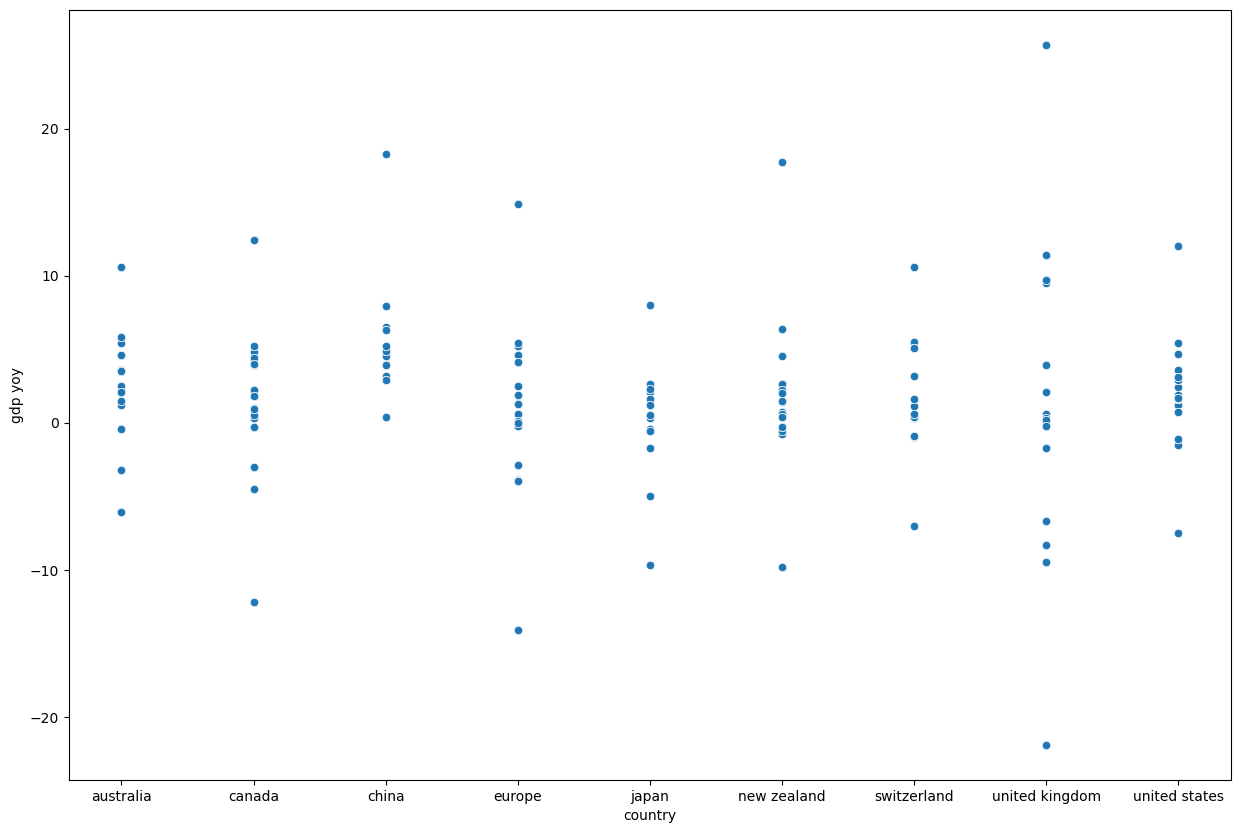

In [34]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_subset,y='gdp yoy', x='country')


<Axes: xlabel='country', ylabel='gdp yoy'>

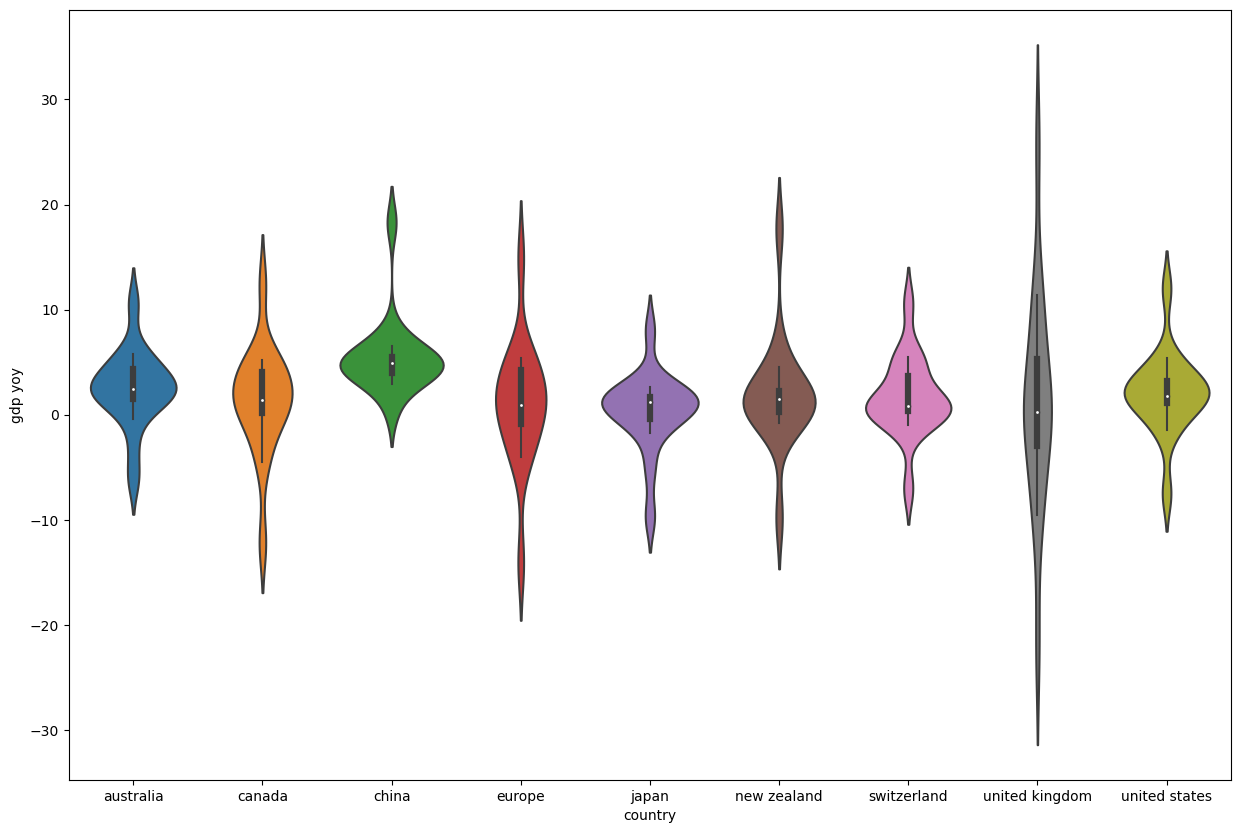

In [35]:
plt.figure(figsize=(15,10))
sns.violinplot(data=df_subset,y='gdp yoy', x='country')


<Figure size 1500x1000 with 0 Axes>

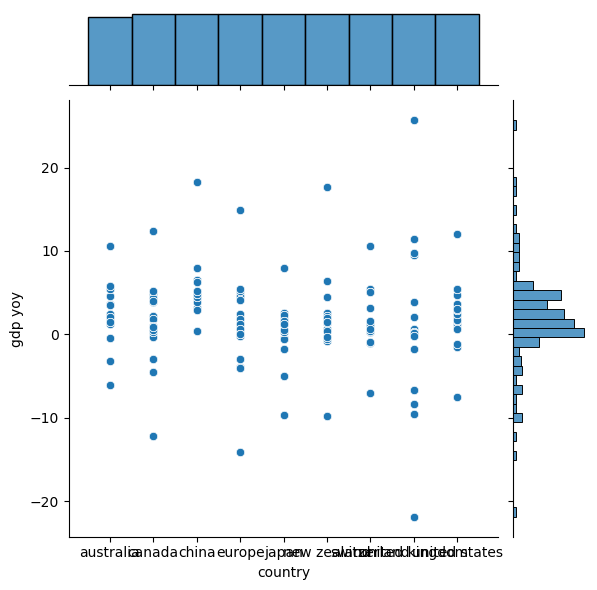

In [36]:
plt.figure(figsize=(15,10))
sns.jointplot(data=df_subset,y='gdp yoy', x='country')

# Indexing with Date

In [37]:
df = df.groupby('date')['gdp yoy'].sum().reset_index()

In [38]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [39]:
df.head()

,gdp yoy
date,
2020-01-01,-1.1
2020-02-01,0.1
2020-03-01,0.1
2020-04-01,-83.4
2020-05-01,-83.4


# Time Series Analysis
Now we analysis Time series data to do so we need to perform following steps

1.Visualizing Data

2.Sampling

3.Checking Stationarity

4.Decomposing


# Visualizing data

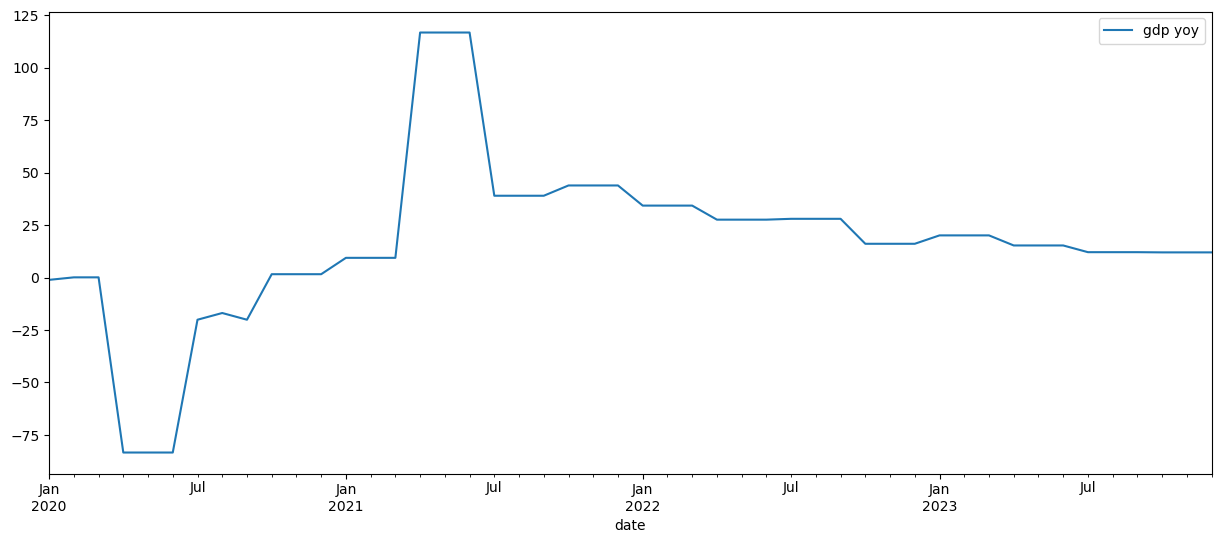

In [40]:
df.plot(figsize=(15,6))
plt.show()

# Sampling

In [41]:
y = df['gdp yoy'].resample('MS').mean()

In [42]:
y

date
2020-01-01     -1.1
2020-02-01      0.1
2020-03-01      0.1
2020-04-01    -83.4
2020-05-01    -83.4
2020-06-01    -83.4
2020-07-01    -20.1
2020-08-01    -16.9
2020-09-01    -20.1
2020-10-01      1.6
2020-11-01      1.6
2020-12-01      1.6
2021-01-01      9.4
2021-02-01      9.4
2021-03-01      9.4
2021-04-01    116.8
2021-05-01    116.8
2021-06-01    116.8
2021-07-01     39.0
2021-08-01     39.0
2021-09-01     39.0
2021-10-01     43.9
2021-11-01     43.9
2021-12-01     43.9
2022-01-01     34.3
2022-02-01     34.3
2022-03-01     34.3
2022-04-01     27.6
2022-05-01     27.6
2022-06-01     27.6
2022-07-01     28.0
2022-08-01     28.0
2022-09-01     28.0
2022-10-01     16.1
2022-11-01     16.1
2022-12-01     16.1
2023-01-01     20.1
2023-02-01     20.1
2023-03-01     20.1
2023-04-01     15.3
2023-05-01     15.3
2023-06-01     15.3
2023-07-01     12.1
2023-08-01     12.1
2023-09-01     12.1
2023-10-01     12.0
2023-11-01     12.0
2023-12-01     12.0
Freq: MS, Name: gdp yoy, dtype: flo

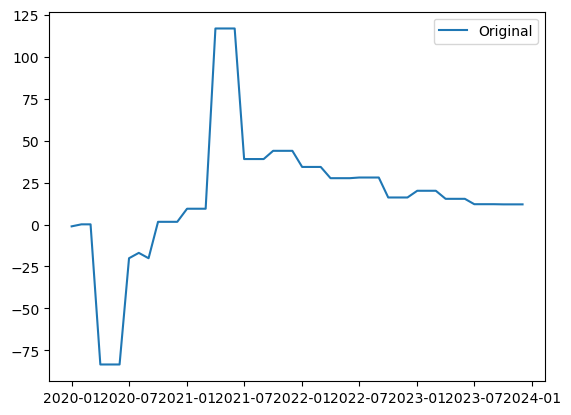

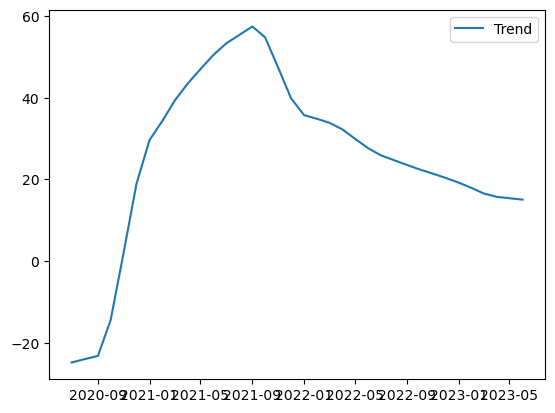

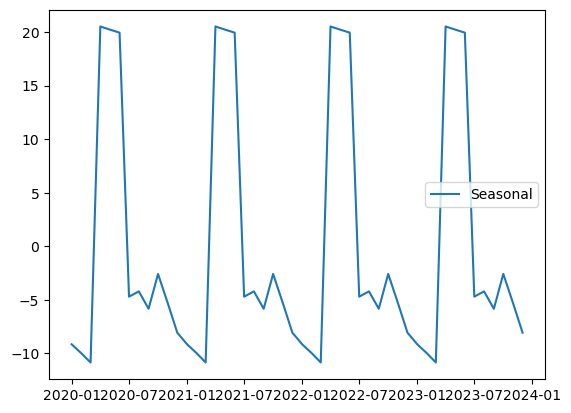

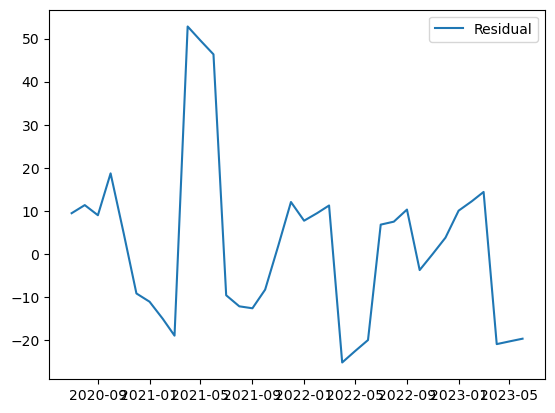

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

# Checking Stationarity

Null Hypothesis: The series has a unit root (value of a =1)(not stationary)

Alternate Hypothesis: The series has no unit root (stationary)

In [44]:
from statsmodels.tsa.stattools import adfuller

In [45]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.306110
p-value: 0.170005
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


# Decomposing
Decomposing the time series into three distinct components: trend, seasonality, and noise.

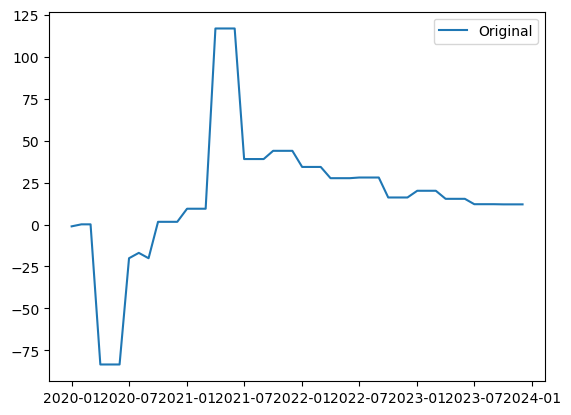

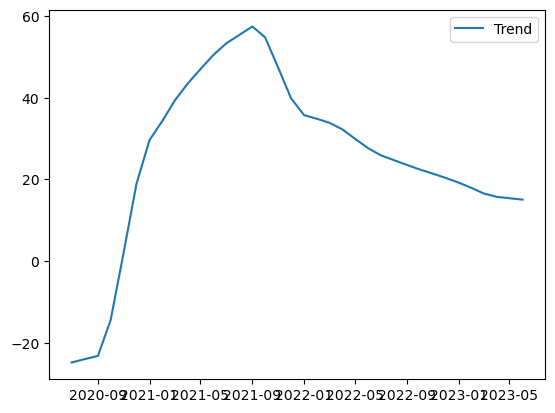

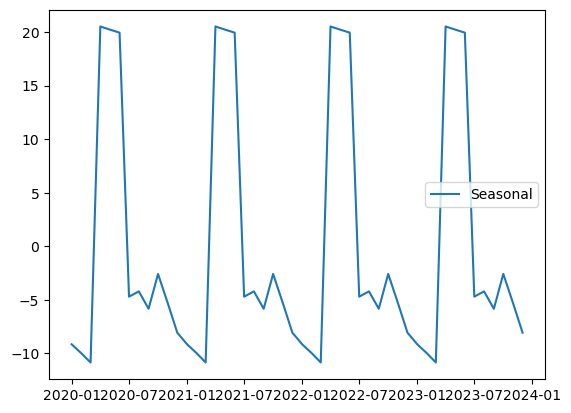

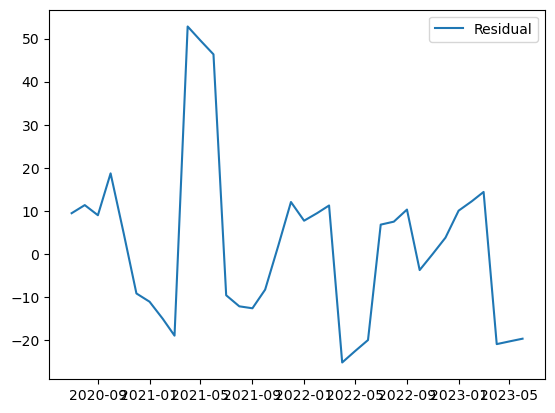

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

# Time Series Forcasting using SARIMAX

In [47]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


# Parameter Selection

In [48]:
import statsmodels.api as sm
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False, 
            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:488.0217954682207
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1643.9321072548908
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:397.61545716287594


C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:183.69204371467228
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:374.4036665679761
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:346.7958618540591
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:220.75437345871308
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:209.99547287425764
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:451.6972671532703


C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1502.4706870984592
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:371.0235974019461
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:165.67435462095278
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:350.54679905901185
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:315.6399588415911
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:211.90235648989906
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:192.09476477376535
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:429.8184026338402


C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1356.431478000529
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:361.0183537844282
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:153.63675335790643
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:303.35236533399427


C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1377.8025418702182
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:193.47137672346307
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:180.2197011255193
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:423.5062663607311


C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1317.6082585608306
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:353.4432858054591
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:149.81392694371246
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:305.3493097617936


C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1368.3818901106215
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:195.4684918767868
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:175.13217889586807
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:435.8965160810845


C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1739.369035392928
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:368.2628648763648
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:156.44612668058525
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:304.1331130076415
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:289.27048138499987
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:192.46391248517122
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:186.5555012097356
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:429.3569625140979


C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1474.5176521333742
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:360.4113457447766
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:151.7083164497438
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:306.109797081397
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:284.3663646950752
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:194.30465807219562
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:181.41647903478312
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:431.8176027723965


C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:952.8973559649351
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:363.0174860369686
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:155.68504712304207
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:297.7807669374628


C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1063.2890559023456
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:188.2073013762777
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:182.21491613491816
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:425.50671138840136


C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:225.29383957840383


C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:354.4821107786073
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:151.82167974516472
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:299.780744184691


C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:231.7917074452934
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:189.41870612112635
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:153.81399478197753


# Fitting the SARIMAX model

In [49]:
n_obs = len(y)

if n_obs > 24:

    mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5508      0.456      1.207      0.227      -0.343       1.445
ma.L1         -1.2544      0.530     -2.366      0.018      -2.294      -0.215
sigma2      1192.2155    981.185      1.215      0.224    -730.872    3115.303


C:\Users\win10\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


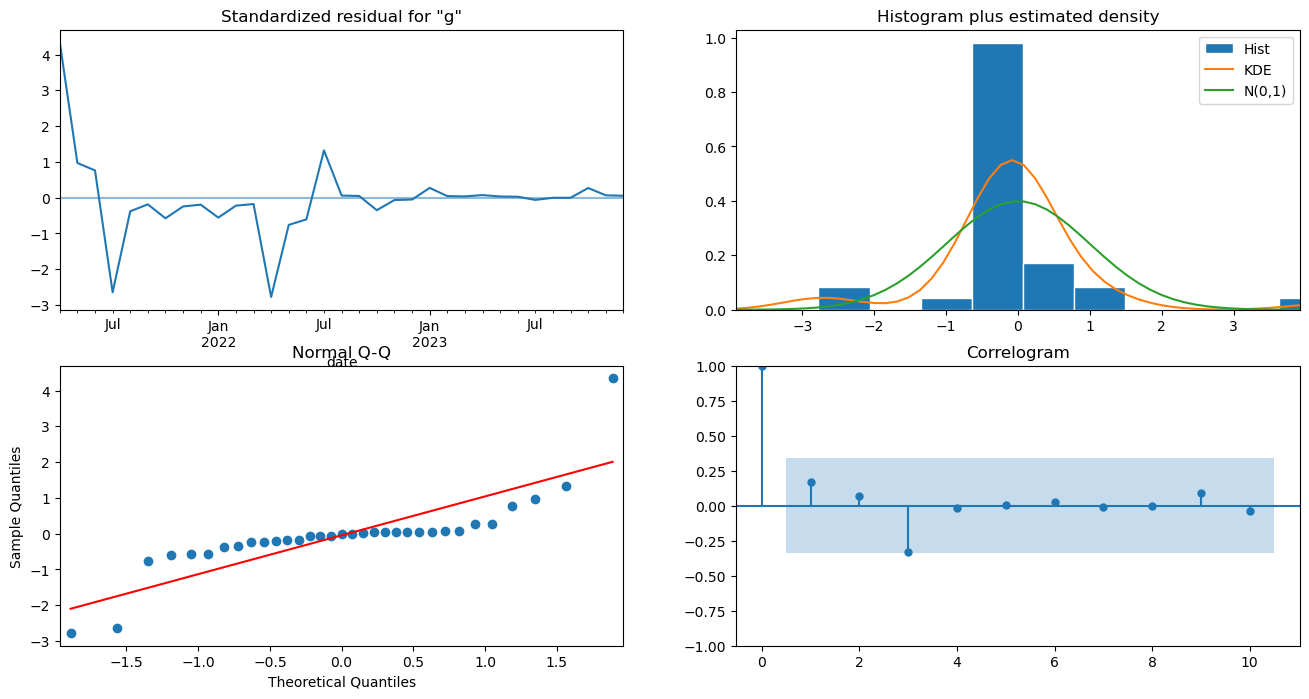

In [50]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Validating Forecasts

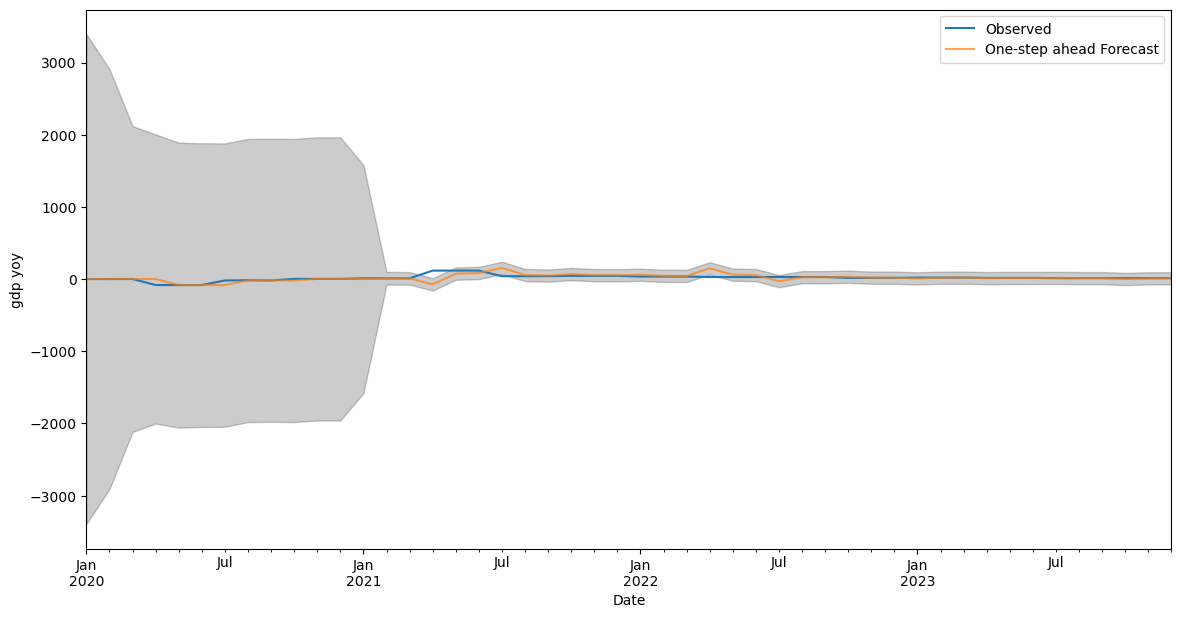

In [51]:
start_date = '2020-01-01'
pred = results.get_prediction(start=pd.to_datetime(start_date), dynamic=False)
pred_ci = pred.conf_int()

   
ax = y[start_date:].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
    
ax.set_xlabel('Date')
ax.set_ylabel('gdp yoy')  
plt.legend()
plt.show()

# Calculating MSE and RMSE

In [52]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 1794.56
The Root Mean Squared Error of our forecasts is 42.36


# Visualizing the Forecast

            lower gdp yoy  upper gdp yoy
2024-01-01     -70.688964      99.096706
2024-02-01     -93.086017     119.515165
2024-03-01    -105.869245     131.208596
2024-04-01    -119.621991     134.761088
2024-05-01    -126.736727     141.545207
2024-06-01    -132.863636     147.490015
2024-07-01    -141.608240     149.734319
2024-08-01    -146.778220     154.849054
2024-09-01    -151.685828     159.726234
2024-10-01    -156.494824     164.318470
2024-11-01    -161.043401     168.857816
2024-12-01    -165.455848     173.265178
2025-01-01    -203.358636     215.572908


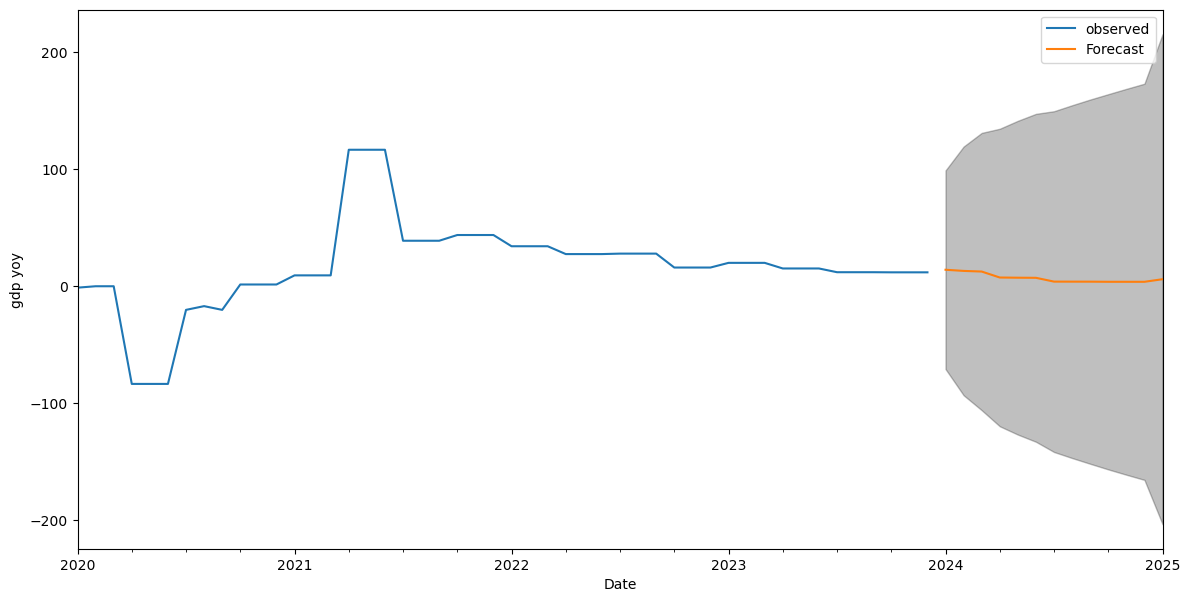

In [53]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('gdp yoy')
print(pred_ci)
plt.legend()
plt.show()